## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [2]:
df.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


Text(0.5, 1.0, 'Распределение')

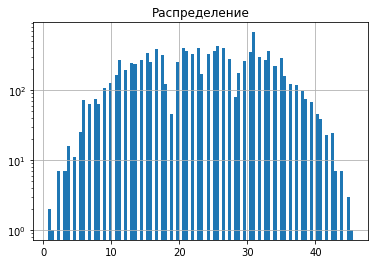

In [3]:
df['atemp'].hist(bins = 100, log='True')
plt.title("Распределение")
#меняешь столбец и получаешь распределение


### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [4]:
print('Метрики count:' + '\n', df['count'].describe()) #количество
print('Метрики registered:' + '\n', df['registered'].describe()) #зареестр
print('Метрики casual:' + '\n', df['casual'].describe()) #случаный
print('Метрики windspeed:' + '\n', df['windspeed'].describe()) #скорость ветра
print('Метрики humidity:' + '\n', df['humidity'].describe()) #влажность
print('Метрики atemp:' + '\n', df['atemp'].describe()) #температура
print('Метрики temp:' + '\n', df['temp'].describe()) #температура
print('Метрики weather:' + '\n', df['weather'].describe()) #погода
print('Метрики workingday:' + '\n', df['workingday'].describe()) #рабочий день
print('Метрики holiday:' + '\n', df['holiday'].describe()) #выходной
print('Метрики season:' + '\n', df['season'].describe()) #сезон

Метрики count:
 count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
Метрики registered:
 count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64
Метрики casual:
 count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64
Метрики windspeed:
 count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64
Метрики humidity:
 count    10886.000000
mean        61.886460
std         19.245033
min          0.

In [5]:
#99 перцентли:
print('99% перц для count',(np.percentile(df['count'], 99)))
print('99% перц для registered',(np.percentile(df['registered'], 99)))
print('99% перц для casual',(np.percentile(df['casual'], 99)))
print('99% перц для windspeed',(np.percentile(df['windspeed'], 99)))
print('99% перц для humidity',(np.percentile(df['humidity'], 99)))
print('99% перц для atemp',(np.percentile(df['atemp'], 99)))
print('99% перц для temp',(np.percentile(df['temp'], 99)))

99% перц для count 774.1499999999996
99% перц для registered 697.0
99% перц для casual 240.14999999999964
99% перц для windspeed 35.0008
99% перц для humidity 100.0
99% перц для atemp 40.15
99% перц для temp 36.08


In [6]:
#Мода:

print('Мода для count' + '\n', df['count'].value_counts().nlargest(5))
print('Мода для registered' + '\n', df['registered'].value_counts().nlargest(5))
print('Мода для casual' + '\n', df['casual'].value_counts().nlargest(5))
print('Мода для windspeed' + '\n', df['windspeed'].value_counts().nlargest(5))
print('Мода для humidity' + '\n', df['humidity'].value_counts().nlargest(5))
print('Мода для atemp' + '\n', df['atemp'].value_counts().nlargest(5))
print('Мода для temp' + '\n', df['temp'].value_counts().nlargest(5))

Мода для count
 5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64
Мода для registered
 3    195
4    190
5    177
6    155
2    150
Name: registered, dtype: int64
Мода для casual
 0    986
1    667
2    487
3    438
4    354
Name: casual, dtype: int64
Мода для windspeed
 0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64
Мода для humidity
 88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64
Мода для atemp
 31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64
Мода для temp
 14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64


In [7]:
#Дисперсия - среднее квадратное отклонение элементов списка от среднего значения
print(df.var())


season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [8]:
def my_new_research(df=df, column = "registered"):
    print("------------------------------------")
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    print("------------------------------------")
    sns.distplot(df[column])
    plt.title("Распределение метрики")



------------------------------------
Эксцесс  2.6243238654959855
Ассиметрия  1.5245944734221468
------------------------------------


E:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


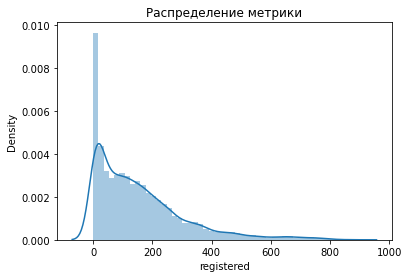

In [9]:
my_new_research(column = 'registered')

Асиметрія додатна, якщо «довша частина» розподілу знаходиться праворуч від математичного сподівання; асиметрія від'ємна, якщо «довша частина» кривої знаходиться ліворуч від математичного сподівання.[2]

На практиці, знак асиметрії визначають за положенням кривої відносно моди: якщо «довша» частина кривої знаходиться правіше моди, то асиметрія додатня, якщо лівіше — від'ємна.

Для нормального розподілу {\displaystyle (\mu _{4}/\sigma ^{4})=3}{\displaystyle (\mu _{4}/\sigma ^{4})=3}; із чого випливає, що ексцес нормального розподілу дорівнює нулю. Якщо ексцес деякого розподілу відмінний від нуля, то крива щільності цього розподілу відрізняється від кривої щільності нормального розподілу: якщо ексцес додатній, то крива теоретичного має вищу та «гострішу» вершину ніж крива нормального; якщо ексцес від'ємний, то крива теоретичного має нижчу та «плоскішу» вершину ніж крива нормального. При цьому вважається, що нормальний і теоретичний розподіли мають однакові математичні сподівання та дисперсії.[1]

**В нашому випадку маємо не нормальний розподіл, оскільки коеф асиметрії додатній, тобто це означає, що ступінь несиметричності даних відносно середнього значення достатньо високий.**

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Text(0.5, 1.0, 'График для самой большой метрики по count')

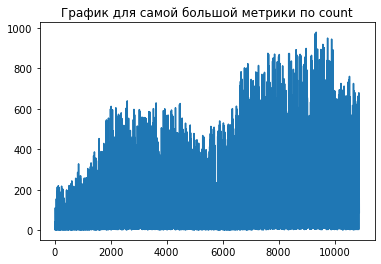

In [10]:
df['count'].plot()
plt.title("График для самой большой метрики по count")


In [11]:
def my_basic_research(df=df, column = "count"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64
------------------------------------
Эксцесс  1.2989447727380323
Ассиметрия  1.241895058803035


E:\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


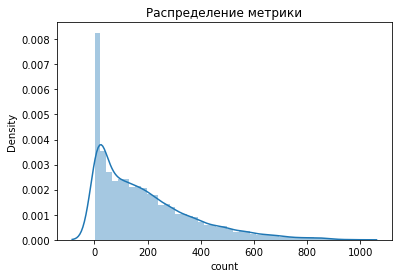

In [12]:
my_basic_research(column = "count")

In [13]:
def my_norm_confidence(df=df, column = "count", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [14]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


У статистиці так званий логнормальний розподіл застосовується в тому випадку, коли починає змінюватися ціна активу в майбутньому, а це — випадковий процес, що в принципі повинний описуватися нормальним розподілом. Водночас для цілей імовірнісної оцінки вартості активу в теорії використовують не нормальний, а логнормальний розподіл. Це обумовлено наступним:

По-перше, нормальний розподіл симетричний щодо її центральної осі і може мати як додатні, так і від'ємні значення; однак ціна активу не може бути від'ємною.
По-друге, нормальний розподіл говорить про рівну імовірність для відхилення значень змінної чи нагору вниз. У той же час на практиці, наприклад, має місце інфляція, що натискає на ціни убік їхнього підвищення, а також сама тимчасова сутність грошей: вартість грошей сьогодні менше, ніж вартість грошей учора, але більше, ніж вартість грошей завтра.
Крива логнормального розподілу завжди додатня і має правобічну скошеність (асиметрично), тобто вона вказує на велику імовірність відхилення ціни вгору. Тому якщо, допустимо, ціна активу становить 50 дол., то крива логнормального розподілу свідчить про те, що пут-опціон з ціною виконання 45 дол. повинний коштувати менше колл-опціону із ціною виконання 55 дол., у той час як відповідно до нормального розподілу вони повинні були б мати однакову ціну. Хоча не можна сподіватися, що приведені вихідні припущення в точності виконуються у всіх реальних ринкових ситуаціях, проте прийнято вважати, що логнормальний розподіл є достатньо добрим як перше наближення у випадку активів, якими торгують на конкурентних ринках аукціонного типу для довгих розглянутих періодів.

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

Это совершенноо точно бимодальное распределение, оформим наши заготовки в функцию, оставив верхнюю границу от правил трех сигм и 99 квантиль:

In [18]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [19]:
#меняешь просто колонки в функции
# season	holiday	workingday	weather	temp	atemp	humidity	windspeed	casual	registered	count

In [31]:
anomaly = find_anomaly(df=df, column = "season")
len(anomaly[0])/len(df)

0.2511482638250965

Больше всего аномалий больше всего получилось в колонке сезона, погоды и в зависимости от рабочего дня

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

Выберем факторы, которые хочется поисследовать из списка:

In [35]:
research_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [36]:
# Остсортируем только интересные нам колонки
df[research_list].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Постром матрицу парных корреляций для отобранных данных при помощи метода corr() pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [37]:
corr_m = df[research_list].corr()

In [38]:
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Теперь визуализируем полученную матрицу при помощи seaborn heatmap https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

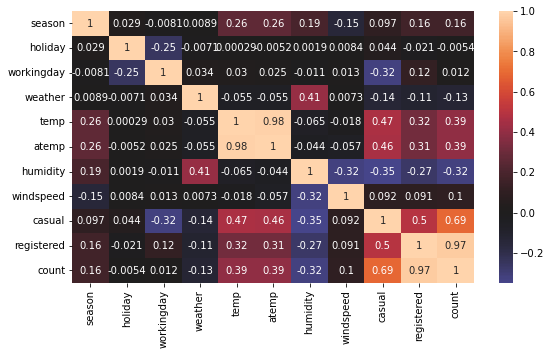

In [40]:
plt.figure(figsize=(9,5))
sns.heatmap(corr_m, center=0, annot=True) #связи между показателями